# FPMI frequency response to gravitational wave perturbation* 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig

I often find it helpful to revisit that which we will need to build upon before moving forward, especially if one has not done this derivation more than a couple of times. Sooooo... 

## *TV drama voiceover*:  Last time.... on *"Deriving LIGO"*

**Michelson frequency response to gravitational wave**

The Michelson interferometer by it's design is a measurement device that can detect small changes in light phase between it's two perpendicular arms.

A gravitational wave offers a unique phase differential that can be characterized mathematically by the following:

$$
\phi_X - \phi_Y = \int_{t-2L/c}^{t} \Omega \bigg[1 + \frac{1}{2}h(t)\bigg]dt - \int_{t-2L/c}^{t} \Omega \bigg[1 - \frac{1}{2}h(t)\bigg]dt \label{eq1}\tag{1}
$$

This eventually led us to the time independent phase response to a monochromatic gravitational wave ($h(t)$): 


$$
\Delta \phi (\omega) = h_0\frac{2 L \Omega}{c}e^{-i L \omega / c} \frac{\mathrm{sin}(L \omega /c)}{L \omega /c} \label{eq2}\tag{2}
$$

Now, we are going to look at how Fabry Perót cavitites can help our Michelson in making a terrestrial gravitational wave detector a useful gravitational wave telescope

# Derivation

Let's start with the simple Fabry Perót cavity, and for the sake of time I'm just going to steal Kiwamu's figure from his thesis: 


<img src="stolen_figs/FP_kiwamu.png" alt="FP_cav" height="700" width="700">

The following are equations that characterize the circulating and reflected fields (both critical to measuring the phase response of the FP cavity to GWs): 

$$
E(t) = t_1 E_{in} + r_1 r_2 E(t - 2T) e^{-i \Delta \phi(t)} \label{eq3}\tag{3}
$$

$$
E_r(t) = -r_1 E_{in} + t_1 r_2 E(t - 2T) e^{-i \Delta \phi(t)} \label{eq4}\tag{4}
$$

$T = L/c$ is the time it takes light to reach the end of the cavity and $\Delta \phi(t)$ is the phase rotation. 

We can define the static phase rotation (no GW passing through) as : 
$$\Delta \phi = 2kL = 4 \pi L /\lambda_{opt}  \label{eq5}\tag{5}$$ 

And if L is tuned just right $2kL = 2 \pi n$ so the cavity is just tuned for resonance

If we put a gravitational wave in the mix we redefine this phase rotation as such that: 
$$\Delta \phi =  \frac{\omega_0}{2} \int_{t-\frac{2L}{c}}^{t} h(t')dt'  \label{eq6}\tag{6}$$ 

This assumes that the static phase rotation satisfies $2\omega_0L/c = 2 \pi n$. Which is the same thing that we said above but with different symbols (because we're fancy ;D ) 

Say that we have something that does throw the cavity slightly off resonance.. doesn't have to be a gravitational wave... but that's what we hope for. ANYWAY...

If the $\Delta \phi$ becomes such that the cavity is thrown off resonance we get a time dependent intra-cavity field: 

$$ E(t) = \bar{E} + \delta E(t) \label{eq7}\tag{7} $$

and if the phase rotation ($\Delta \phi$) is super small... which is pretty much guaranteed with gravy waves, we can say: 

$$ e^{i\Delta \phi} = 1- i \Delta \phi \label{eq8}\tag{8}$$

Using equations \ref{eq7} and \ref{eq8} in \ref{eq3} we get:

$$ \bar{E} + \delta E(t) = t_1 E_{in} -r_1r_2\bar{E} + r_1r_2 \delta E(t-2T) - ir_1r_2\bar{E}\Delta \phi(t)) \label{eq9}\tag{9} $$

We can parse this into time dependent and time independent terms: 

$$ \bar{E} = t_1 E_{in} -r_1r_2\bar{E} \label{eq10}\tag{10} $$

$$ \delta E(t) = r_1r_2 \delta E(t-2T) - ir_1r_2\bar{E}\Delta \phi(t) \label{eq11}\tag{11} $$

Since the time dependent phase information is encoded in \ref{eq11} we will take the laplace transform of this equation to yield: 

$$\delta E(s) = -i \frac{r_1r_2 \bar{E}}{1-r_1r_2e^{-2sT}} \Delta \phi(s)$$

**YAS!** we are now one step closer to getting a useful expression for the phase response. But again.. what does this last equation mean? That last equation is how the change in the electric field directly relates to a small perturbation in phase (which could be either a small change in laser frequency or length modulation)


Now.. we're not done yet because that last expression does not tell us the entire story yet.. we want to see how this effects the phase differential with the **reflected** electric field.

To do this.. we have to combine equations \ref{eq3} and \ref{eq4}. (*an easy way to do this is to get rid of the $ r_2 E(t - 2T) e^{-i \Delta \phi(t)}$ term*) : 

$$ E_r(t) = \frac{t_1}{r_1}E(t) - \frac{t_1^2 + r_2^2}{r_1} E_{in}$$

if the cavity is unperturbed: 

$$ \bar{E}_r = \bigg(\frac{r_2(r_1^2 + t_1^2) - r_1}{t_1} \bigg) \bar{E} $$

and if we perturb the cavity we see that the change in the intra-cavity field is directly related to the change in the reflected field: 

$$ \Delta \phi_r(s) \equiv \frac{\delta E(s)}{\bar{E}} = \frac{t_1^2r_2}{(t_1^2 + r_1^2)r_2 -r_1} \frac{\Delta \phi(s)}{1-r_1r_2e^{-2sT}}$$

This implies that there is an additional frequency dependent factor in your phase shift and this translates into your FPMI transfer function as: 

$$ H_{FPMI}(\omega_g) = \frac{2 \Delta \phi_r(\omega_g)}{h(\omega_g)} =  \frac{t_1^2r_2}{(t_1^2 + r_1^2)r_2 -r_1} \frac{H_{\mathrm{MI}}(\omega_g, L)}{1-r_1r_2e^{-2i \omega_g L /c }}  $$

Whew.... that was a lot.... now let's code it up

Since we can seperate the calculation into two.. I'm going to parse out the calculation between the constant Fabry Perót term and the term with the frequency dependence. But first, lets set up our parameters for our FPMI:

In [37]:
# Some parameters
cee = np.float64(299792458)
OMEG = np.float64(2*np.pi*cee/(1064.0*10-9))
L = np.float64(4000.0)
nu = np.arange(1, 1000000, 1)
nat_nu = [np.float64(i*2*np.pi) for i in nu]
h_0 = np.float64(1)

T_1 = .014
T_2 = 50e-6
R_1 = 1-T_1
R_2 = 1-T_2

t_1 = T_1**.5
r_1 = R_1**.5
r_2 = R_2**.5
 



Okay.... 

Now I will calculate $$\frac{t_2^2}{(t_1^2 + r_1^2)r_2 -r_1}$$

and call it "const"


In [38]:
const = (t_1**2 * r_2)/((t_1**2 + r_1**2)*r_2 -r_1)

Now, 
I will calculate the whole kahuna: 
$$ H_{FPMI}(\omega_g) =  \mathrm{const}\cdot \frac{H_{\mathrm{MI}}(\omega_g, L)}{1-r_1r_2e^{-2i \omega_g L /c }}  $$


In [39]:
def fpmi_freq_resp(freq, const, Length, OMEGA, h0):
    return const*(h0*2.0*Length*OMEGA*np.exp((-1j*L*2.0*np.pi*freq)/cee)*np.sin((L*2.0*np.pi*freq)/cee)/(L*2.0*np.pi*freq))/(1-r_1*r_2*np.exp(-1j*L*2.0*np.pi*freq/cee))

Might as well compare it to our Michelson response: 
$$ H_{\mathrm{MI}}(\omega_g) = h_0\frac{2 L \Omega}{c}e^{-i L \omega / c} \frac{\mathrm{sin}(L \omega /c)}{L \omega /c} $$

In [45]:
def mich_freq_resp(freq, Length, OMEGA, h0):
    return h0*2.0*Length*OMEGA*np.exp((-1j*L*2.0*np.pi*freq)/cee)*np.sin((L*2.0*np.pi*freq)/cee)/(L*2.0*np.pi*freq)

In [46]:
w = nu
#w = [i/(2.0*np.pi) for i in nu ]
H_FPMI = [fpmi_freq_resp(i, const, L, OMEG, h_0) for i in w]
H_MI = [mich_freq_resp(i, L, OMEG, h_0) for i in w]

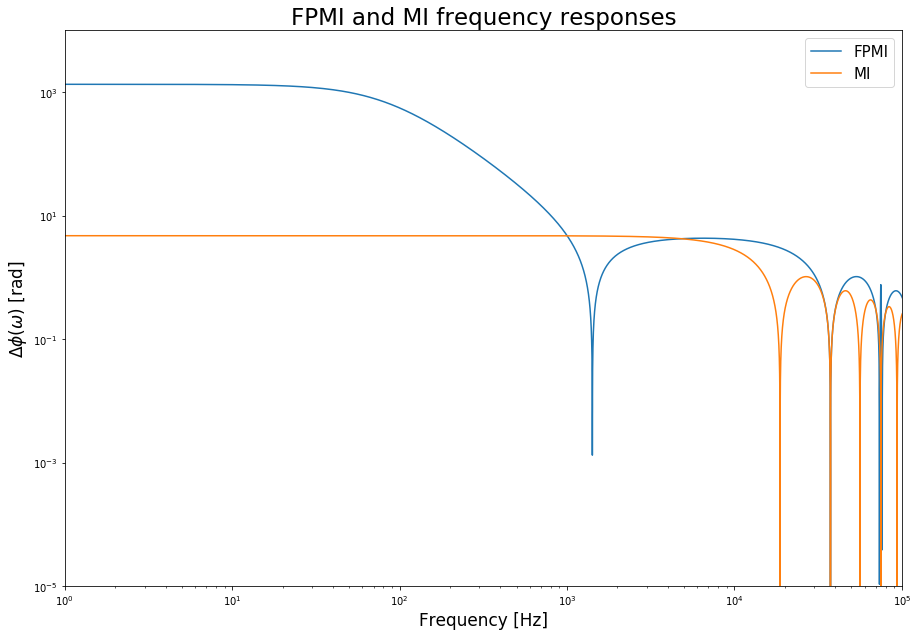

In [58]:
plt.figure(figsize=(15,10.22))
plt.loglog(w,np.abs(np.real(H_FPMI)), label='FPMI')
plt.loglog(w,np.abs(np.real(H_MI)), label= 'MI')
plt.title('FPMI and MI frequency responses', FontSize=23)
plt.xlim([1,100000])
plt.ylim([10e-6, 10e3])
plt.xlabel('Frequency [Hz]',FontSize=17)
plt.ylabel('$\Delta \phi (\omega)$ [rad]',FontSize=17)
lgd=plt.legend(prop={'size': 15})


You can clearly see that there is a clear increase in gain at lower frequencies (below 5000 kHz)
Doesn't exactly look like Kiwamu's but close enough?

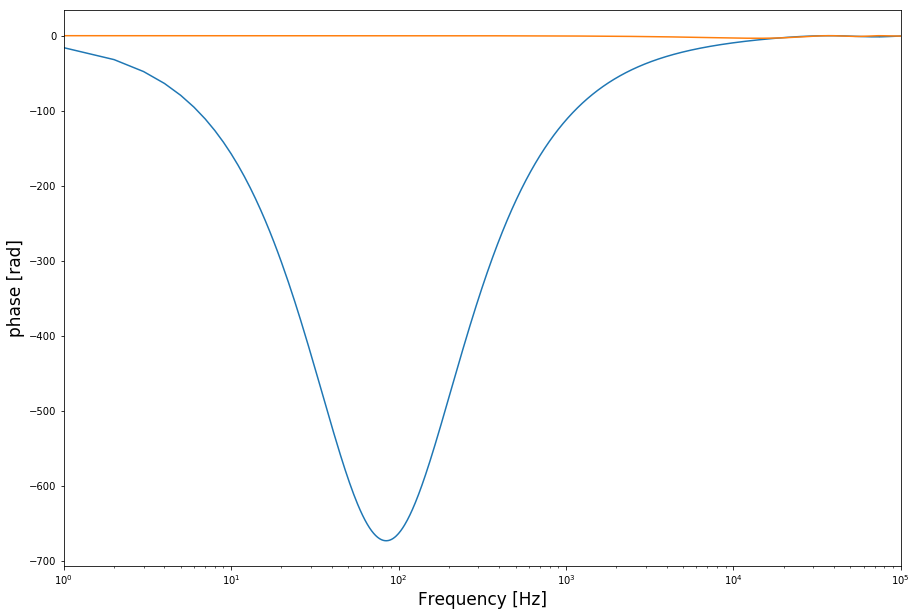

In [60]:
plt.figure(figsize=(15,10.22))
plt.xlim([1,100000])
plt.ylabel('phase [rad]', FontSize=17)
plt.xlabel('Frequency [Hz]', FontSize=17)
plt.semilogx(w,np.imag(H_FPMI))
plt.semilogx(w,np.imag(H_MI))

Don't know WTF this means... will think about later

### *Heavily HEAVILY "inspired" (I pretty much just copied) by Kiwamu's thesis chapter on this subject (https://gwic.ligo.org/thesisprize/2012/izumi-thesis.pdf) This guy is really smart too. 

Next it might be useful to see the frequency dependence of just the FP alone